In [1]:
import pandas as pd

In [3]:
#reading data file
df = pd.read_csv('/survey_results_public.csv') #copy path from the file on left
#the above code helps in reading the document as a dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.head() #to check the structure or of data is being read
df.shape #rows,columns

(12324, 84)

In [ ]:
df.info() #to derive names of 84 variables, datatypes, null values etc.

In [ ]:
pd.set_option('display.max_columns', 84) #to enable dataframe df command to display all columns
df

In [4]:
import pandas as pd
schema_df = pd.read_csv('/survey_results_schema.csv')
schema_df

qid        qname                                           question  \
0    QID16           S0  <div><span style="font-size:19px;"><strong>Hel...   
1    QID12     MetaInfo                                  Browser Meta Info   
2   QID310         Q310  <div><span style="font-size:19px;"><strong>You...   
3   QID312         Q120                                                      
4     QID1           S1  <span style="font-size:22px; font-family: aria...   
..     ...          ...                                                ...   
73  QID289  Knowledge_7  Waiting on answers to questions often causes i...   
74  QID289  Knowledge_8  I feel like I have the tools and/or resources ...   
75  QID290  Frequency_1  Needing help from people outside of your immed...   
76  QID290  Frequency_2  Interacting with people outside of your immedi...   
77  QID290  Frequency_3  Encountering knowledge silos (where one indivi...   

   force_resp  type selector  
0       False    DB       TB  
1       False  Meta  Browser  
2       False    DB       TB  
3        True    MC     SAVR  
4       False    DB       TB  
..        ...   ...      ...  
73        NaN    MC     MAVR  
74        NaN    MC     MAVR  
75        NaN    MC     MAVR  
76        NaN    MC     MAVR  
77        NaN    MC     MAVR  

[78 rows x 6 columns]

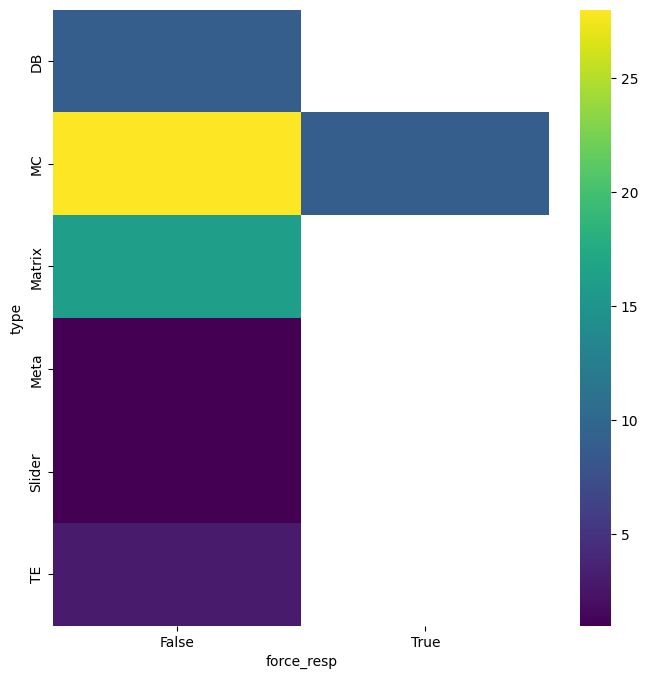

In [8]:
# @title force_resp vs type

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['type'].value_counts()
    for x_label, grp in schema_df.groupby('force_resp')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('force_resp')
_ = plt.ylabel('type')

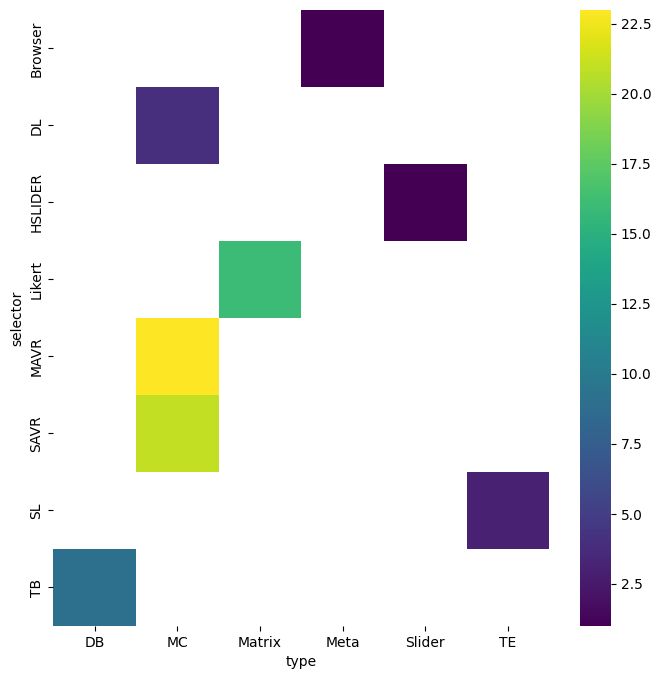

In [7]:
# @title type vs selector

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['selector'].value_counts()
    for x_label, grp in schema_df.groupby('type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('type')
_ = plt.ylabel('selector')

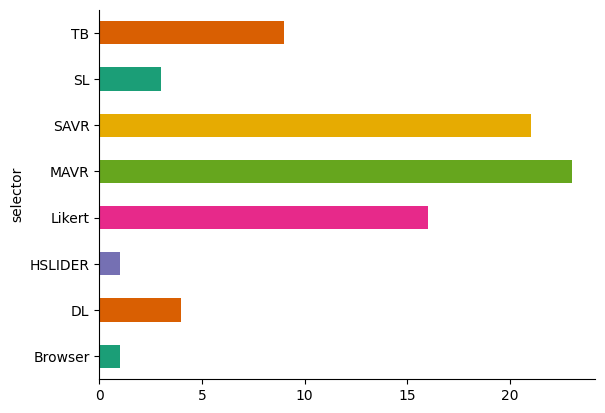

In [6]:
# @title selector

from matplotlib import pyplot as plt
import seaborn as sns
schema_df.groupby('selector').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: ylabel='force_resp'>

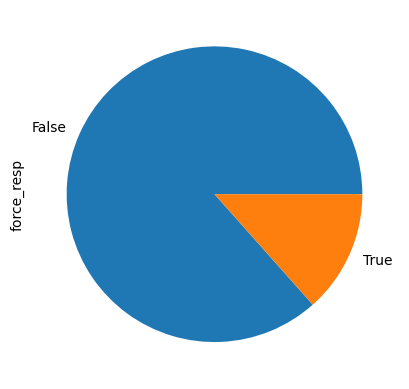

In [5]:
# @title Required Response Distribution

schema_df['force_resp'].value_counts().plot(kind='pie')

In [ ]:
pd.set_option('display.max_rows', 78)
schema_df

In [ ]:
# @title Question types used in the survey

import matplotlib.pyplot as plt

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
schema_df.groupby('type').size().plot(kind='pie', figsize=(15, 6), autopct='%1.1f%%', startangle=90, shadow=True, labels=None, colors=colors_list, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Question types used in the survey')
plt.axis('equal')
_ = plt.legend(labels=schema_df.groupby('type').size().index, loc='upper right')

In [ ]:
#for a quick check to see the changes reflecting as we work with our dataset, use this anytime
df.head(10)
#df.tail() for retrieving last rows of data

In [ ]:
# #Abridged Version of above code-in few steps-Video 1
# import pandas as pd

# df = pd.read_csv('/survey_results_public.csv')

# df.head()
# df.shape
# df.info()
# pd.set_option('display.max_columns', 84)
# df
# schema_df = pd.read_csv('/survey_results_schema.csv')
# schema_df

# df.head(10)


In [9]:
df['MainBranch']

0                         None of these
1        I am a developer by profession
2        I am a developer by profession
3        I am a developer by profession
4        I am a developer by profession
                      ...              
16495    I am a developer by profession
16496    I am a developer by profession
16497    I am a developer by profession
16498    I am a developer by profession
16499    I am a developer by profession
Name: MainBranch, Length: 16500, dtype: object

In [10]:
print(df['Age'].value_counts())
print (df[['Employment','Age']].value_counts())
#Gives you the number of answers in each category of age (options)


25-34 years old       6751
35-44 years old       3954
18-24 years old       3221
45-54 years old       1352
Under 18 years old     560
55-64 years old        454
65 years or older      127
Prefer not to say       81
Name: Age, dtype: int64
Employment                                                                                                                                          Age              
Employed, full-time                                                                                                                                 25-34 years old      4962
                                                                                                                                                    35-44 years old      2858
                                                                                                                                                    18-24 years old      1087
                                                                        

In [11]:
df[['MainBranch','Employment']]

MainBranch  \
0                       None of these   
1      I am a developer by profession   
2      I am a developer by profession   
3      I am a developer by profession   
4      I am a developer by profession   
...                               ...   
16495  I am a developer by profession   
16496  I am a developer by profession   
16497  I am a developer by profession   
16498  I am a developer by profession   
16499  I am a developer by profession   

                                              Employment  
0                                                    NaN  
1                                    Employed, full-time  
2                                    Employed, full-time  
3                                    Employed, full-time  
4      Employed, full-time;Independent contractor, fr...  
...                                                  ...  
16495                                Employed, full-time  
16496                                Employed, full-time  
16497                                Employed, full-time  
16498                                Employed, full-time  
16499                                Employed, full-time  

[16500 rows x 2 columns]

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('MainBranch').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

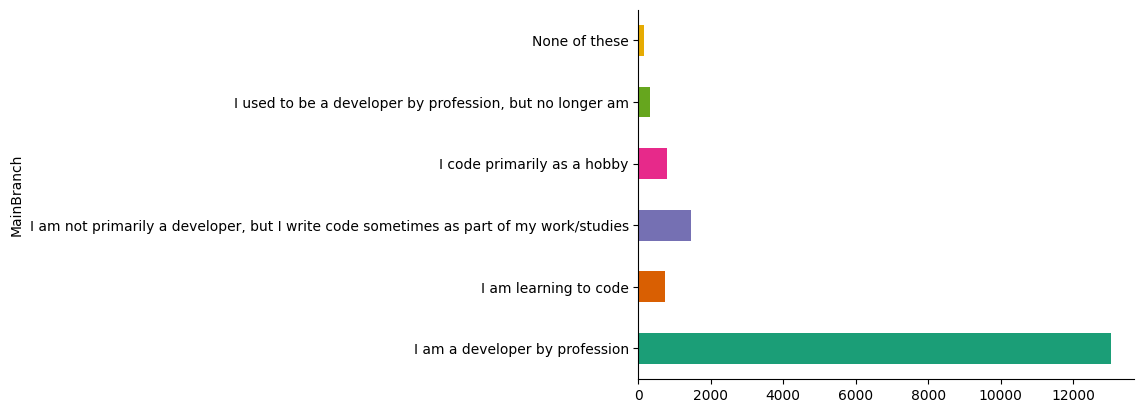

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('MainBranch').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
#to get lits of all columns in a dataset
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [ ]:

print (df.iloc[0])


In [14]:
print(df.iloc[0,2]) #resulted in "none of these" [row, column]
#the value of instersection between row INDEX '0' and column INDEX 2 "Employment-answer for respondent 0"



None of these


In [15]:
print (df.iloc[[0,2],6]) #[[list of rows/row index],[list of variables,columns]]
#will result row 0 and row 2's value in column 6 "Coding activities"



0                                                  NaN
2    Hobby;Professional development or self-paced l...
Name: CodingActivities, dtype: object


In [16]:
print (df.iloc[[0,2,4,5,6],[1,3,4,5,6,7,8]])
#will derive values for repondents 0,1,2,3,4,5 in columns/variables 2,4,6,8

      Q120              Age  \
0  I agree  18-24 years old   
2  I agree  45-54 years old   
4  I agree  25-34 years old   
5  I agree  35-44 years old   
6  I agree  35-44 years old   

                                          Employment  \
0                                                NaN   
2                                Employed, full-time   
4  Employed, full-time;Independent contractor, fr...   
5                                Employed, full-time   
6                                Employed, full-time   

                             RemoteWork  \
0                                   NaN   
2  Hybrid (some remote, some in-person)   
4                                Remote   
5                                Remote   
6                                Remote   

                                    CodingActivities  \
0                                                NaN   
2  Hobby;Professional development or self-paced l...   
4  Hobby;Contribute to open-source projects;Profe

In [17]:
#df loc functionality
print(df.loc[[0,2]]) #to derive rows 0 and 2

#with using loc function you can only call for values using row index but Column NAMES unlike iloc, where we use column index
df.loc[[0,2],['Age','Employment']]

#to retrieve a range of rows information for a single column
print(df.loc[0:20,'CodingActivities'])

   ResponseId     Q120                      MainBranch              Age  \
0           1  I agree                   None of these  18-24 years old   
2           3  I agree  I am a developer by profession  45-54 years old   

            Employment                            RemoteWork  \
0                  NaN                                   NaN   
2  Employed, full-time  Hybrid (some remote, some in-person)   

                                    CodingActivities  \
0                                                NaN   
2  Hobby;Professional development or self-paced l...   

                                        EdLevel  \
0                                           NaN   
2  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                           LearnCode  \
0                                                NaN   
2  Books / Physical media;Colleague;On the job tr...   

                                     LearnCodeOnline  ...        Frequency_1  \
0        

In [18]:
#to derive values for a range of rows and for range of columns
df.loc [0:5, 'MainBranch':'RemoteWork']

MainBranch              Age  \
0                   None of these  18-24 years old   
1  I am a developer by profession  25-34 years old   
2  I am a developer by profession  45-54 years old   
3  I am a developer by profession  25-34 years old   
4  I am a developer by profession  25-34 years old   
5  I am a developer by profession  35-44 years old   

                                          Employment  \
0                                                NaN   
1                                Employed, full-time   
2                                Employed, full-time   
3                                Employed, full-time   
4  Employed, full-time;Independent contractor, fr...   
5                                Employed, full-time   

                             RemoteWork  
0                                   NaN  
1                                Remote  
2  Hybrid (some remote, some in-person)  
3  Hybrid (some remote, some in-person)  
4                                Remote  
5                                Remote

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('MainBranch').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Age').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Employment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('RemoteWork').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Age'].value_counts()
    for x_label, grp in _df_5.groupby('MainBranch')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('MainBranch')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Employment'].value_counts()
    for x_label, grp in _df_6.groupby('Age')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Age')
_ = plt.ylabel('Employment')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['RemoteWork'].value_counts()
    for x_label, grp in _df_7.groupby('Employment')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Employment')
_ = plt.ylabel('RemoteWork')

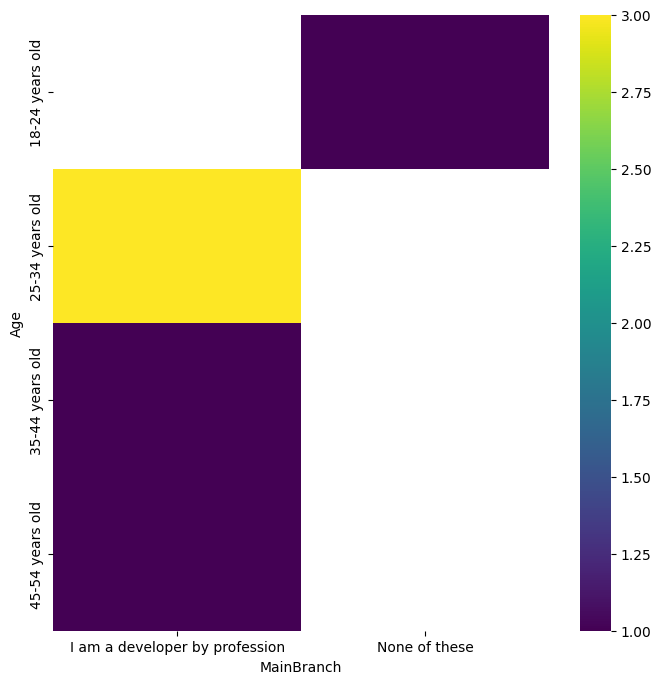

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Age'].value_counts()
    for x_label, grp in _df_5.groupby('MainBranch')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('MainBranch')
_ = plt.ylabel('Age')

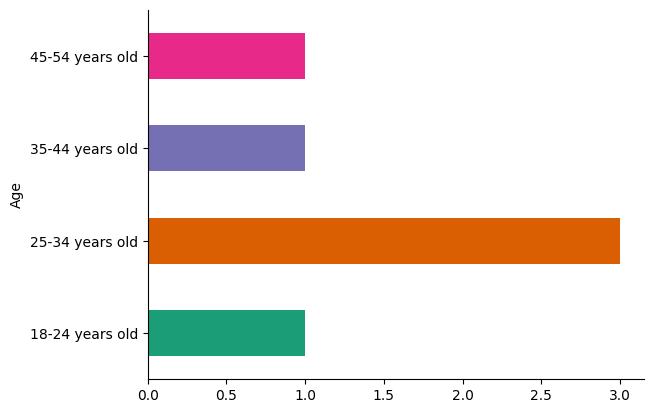

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Age').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Q120                      MainBranch              Age  \
ResponseId                                                             
1           I agree                   None of these  18-24 years old   
2           I agree  I am a developer by profession  25-34 years old   
3           I agree  I am a developer by profession  45-54 years old   
4           I agree  I am a developer by profession  25-34 years old   
5           I agree  I am a developer by profession  25-34 years old   
...             ...                             ...              ...   
16496       I agree  I am a developer by profession  35-44 years old   
16497       I agree  I am a developer by profession  45-54 years old   
16498       I agree  I am a developer by profession  25-34 years old   
16499       I agree  I am a developer by profession  25-34 years old   
16500       I agree  I am a developer by profession  45-54 years old   

                                                   Employment  \
ResponseId                                                      
1                                                         NaN   
2                                         Employed, full-time   
3                                         Employed, full-time   
4                                         Employed, full-time   
5           Employed, full-time;Independent contractor, fr...   
...                                                       ...   
16496                                     Employed, full-time   
16497                                     Employed, full-time   
16498                                     Employed, full-time   
16499                                     Employed, full-time   
16500                                     Employed, full-time   

                                      RemoteWork  \
ResponseId                                         
1                                            NaN   
2                                         Remote   
3           Hybrid (some remote, some in-person)   
4           Hybrid (some remote, some in-person)   
5                                         Remote   
...                                          ...   
16496       Hybrid (some remote, some in-person)   
16497       Hybrid (some remote, some in-person)   
16498                                  In-person   
16499       Hybrid (some remote, some in-person)   
16500       Hybrid (some remote, some in-person)   

                                             CodingActivities  \
ResponseId                                                      
1                                                         NaN   
2           Hobby;Contribute to open-source projects;Boots...   
3           Hobby;Professional development or self-paced l...   
4                                                       Hobby   
5           Hobby;Contribute to open-source projects;Profe...   
...                                                       ...   
16496       Professional development or self-paced learnin...   
16497                                                   Hobby   
16498       Hobby;Professional development or self-paced l...   
16499                                                   Hobby   
16500       Hobby;Bootstrapping a business;Professional de...   

                                                      EdLevel  \
ResponseId                                                      
1                                                         NaN   
2                Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3                Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4                Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
5                Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
...                                                       ...   
16496         Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
16497            Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
16498          Professional degree (JD, MD, Ph.D, Ed.D, etc

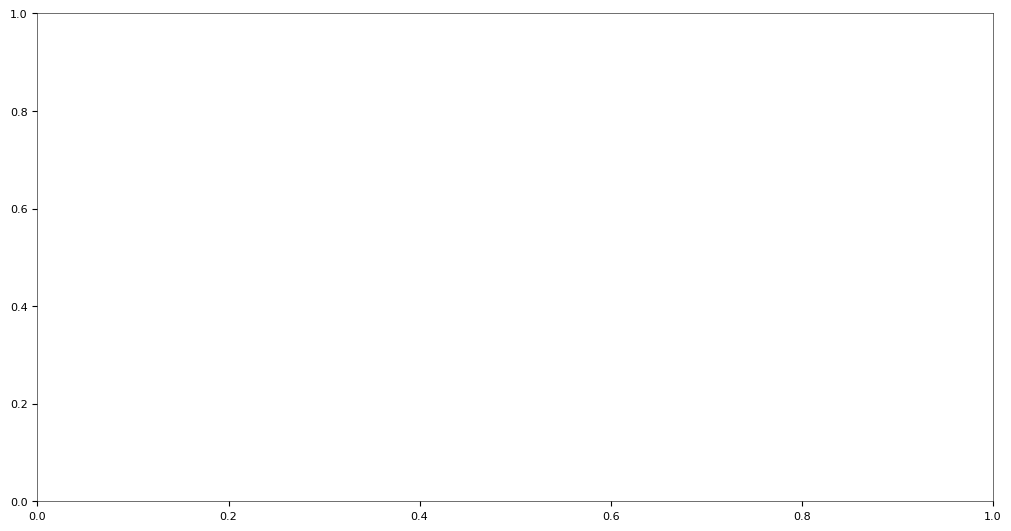

In [23]:
df.set_index('ResponseId')

In [24]:
df

ResponseId     Q120                      MainBranch              Age  \
0               1  I agree                   None of these  18-24 years old   
1               2  I agree  I am a developer by profession  25-34 years old   
2               3  I agree  I am a developer by profession  45-54 years old   
3               4  I agree  I am a developer by profession  25-34 years old   
4               5  I agree  I am a developer by profession  25-34 years old   
...           ...      ...                             ...              ...   
16495       16496  I agree  I am a developer by profession  35-44 years old   
16496       16497  I agree  I am a developer by profession  45-54 years old   
16497       16498  I agree  I am a developer by profession  25-34 years old   
16498       16499  I agree  I am a developer by profession  25-34 years old   
16499       16500  I agree  I am a developer by profession  45-54 years old   

                                              Employment  \
0                                                    NaN   
1                                    Employed, full-time   
2                                    Employed, full-time   
3                                    Employed, full-time   
4      Employed, full-time;Independent contractor, fr...   
...                                                  ...   
16495                                Employed, full-time   
16496                                Employed, full-time   
16497                                Employed, full-time   
16498                                Employed, full-time   
16499                                Employed, full-time   

                                 RemoteWork  \
0                                       NaN   
1                                    Remote   
2      Hybrid (some remote, some in-person)   
3      Hybrid (some remote, some in-person)   
4                                    Remote   
...                                     ...   
16495  Hybrid (some remote, some in-person)   
16496  Hybrid (some remote, some in-person)   
16497                             In-person   
16498  Hybrid (some remote, some in-person)   
16499  Hybrid (some remote, some in-person)   

                                        CodingActivities  \
0                                                    NaN   
1      Hobby;Contribute to open-source projects;Boots...   
2      Hobby;Professional development or self-paced l...   
3                                                  Hobby   
4      Hobby;Contribute to open-source projects;Profe...   
...                                                  ...   
16495  Professional development or self-paced learnin...   
16496                                              Hobby   
16497  Hobby;Professional development or self-paced l...   
16498                                              Hobby   
16499  Hobby;Bootstrapping a business;Professional de...   

                                                 EdLevel  \
0                                                    NaN   
1           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
...                                                  ...   
16495    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
16496       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
16497     Professional degree (JD, MD, Ph.D, Ed.D, etc.)   
16498       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
16499  Some college/university study without earning ...   

                                               LearnCode  \
0                                                    NaN   
1      Books / Physical media;Colleague;Friend or fam...   
2      Books / Physical media;Colleague;On the job tr...   
3      Colleague;Friend or family member;Other online...   
4      Books / Physical media;

In [28]:
#pulling out records using response_id
print (df.loc[5]) #to print details of respondent_id 5
#for a range of values
print (df.loc[0:5])



Q120                                                             I agree
MainBranch                                I am a developer by profession
Age                                                      25-34 years old
Employment             Employed, full-time;Independent contractor, fr...
RemoteWork                                                        Remote
                                             ...                        
ProfessionalTech       Microservices;Automated testing;Observability ...
Industry                                                           Other
SurveyLength                                       Appropriate in length
SurveyEase                                    Neither easy nor difficult
ConvertedCompYearly                                              23456.0
Name: 5, Length: 83, dtype: object
               Q120                      MainBranch              Age  \
ResponseId                                                             
1           I agre

In [29]:
#for a specific variable(s)
print(df.loc[5],['Age','Employment'])
print (df.loc[1:5,'Age':'EdLevel']) #for a range of values, everything falls in one set of brackets reprstng list

Q120                                                             I agree
MainBranch                                I am a developer by profession
Age                                                      25-34 years old
Employment             Employed, full-time;Independent contractor, fr...
RemoteWork                                                        Remote
                                             ...                        
ProfessionalTech       Microservices;Automated testing;Observability ...
Industry                                                           Other
SurveyLength                                       Appropriate in length
SurveyEase                                    Neither easy nor difficult
ConvertedCompYearly                                              23456.0
Name: 5, Length: 83, dtype: object ['Age', 'Employment']
                        Age  \
ResponseId                    
1           18-24 years old   
2           25-34 years old   
3           45-5

In [30]:
#to set index back to normal (removing response id as index)
df.reset_index(inplace=True)
print (df) #note 84 columns

       ResponseId     Q120                      MainBranch              Age  \
0               1  I agree                   None of these  18-24 years old   
1               2  I agree  I am a developer by profession  25-34 years old   
2               3  I agree  I am a developer by profession  45-54 years old   
3               4  I agree  I am a developer by profession  25-34 years old   
4               5  I agree  I am a developer by profession  25-34 years old   
...           ...      ...                             ...              ...   
16495       16496  I agree  I am a developer by profession  35-44 years old   
16496       16497  I agree  I am a developer by profession  45-54 years old   
16497       16498  I agree  I am a developer by profession  25-34 years old   
16498       16499  I agree  I am a developer by profession  25-34 years old   
16499       16500  I agree  I am a developer by profession  45-54 years old   

                                              Emplo

In [31]:
#Instead you can replace the index of the dataset in step 1 where you read the data file
#df =pd.read_csv('/survey_results_public.csv',index_col='ResponseId')

In [32]:
schema_df.sort_index()
#schema_df.sort_index(ascending=False) for arranging the data in Descending order
#For making the sorting permanent, add inplace ='True' to the command

qid        qname                                           question  \
0    QID16           S0  <div><span style="font-size:19px;"><strong>Hel...   
1    QID12     MetaInfo                                  Browser Meta Info   
2   QID310         Q310  <div><span style="font-size:19px;"><strong>You...   
3   QID312         Q120                                                      
4     QID1           S1  <span style="font-size:22px; font-family: aria...   
..     ...          ...                                                ...   
73  QID289  Knowledge_7  Waiting on answers to questions often causes i...   
74  QID289  Knowledge_8  I feel like I have the tools and/or resources ...   
75  QID290  Frequency_1  Needing help from people outside of your immed...   
76  QID290  Frequency_2  Interacting with people outside of your immedi...   
77  QID290  Frequency_3  Encountering knowledge silos (where one indivi...   

   force_resp  type selector  
0       False    DB       TB  
1       False  Meta  Browser  
2       False    DB       TB  
3        True    MC     SAVR  
4       False    DB       TB  
..        ...   ...      ...  
73        NaN    MC     MAVR  
74        NaN    MC     MAVR  
75        NaN    MC     MAVR  
76        NaN    MC     MAVR  
77        NaN    MC     MAVR  

[78 rows x 6 columns]

from matplotlib import pyplot as plt
import seaborn as sns
_df_32.groupby('force_resp').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_33.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_34.groupby('selector').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['type'].value_counts()
    for x_label, grp in _df_35.groupby('force_resp')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('force_resp')
_ = plt.ylabel('type')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['selector'].value_counts()
    for x_label, grp in _df_36.groupby('type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('type')
_ = plt.ylabel('selector')

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['selector'].value_counts()
    for x_label, grp in _df_36.groupby('type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('type')
_ = plt.ylabel('selector')

In [33]:
# Filtering
df['Age']== '18-24 years old' #to filter will define each record as TRUE or FALSE based on condition
filt = df['Age']=='18-24 years old'
#Running this filter on dataframe (below) will result in records meeting this criteria
df[filt]
#using the .loc function you can further filter on columns you want within 18-24 group
df.loc[filt,'Employment']


0                                                      NaN
40                                     Employed, full-time
43                                     Employed, full-time
58       Not employed, but looking for work;Student, fu...
64                                     Employed, full-time
                               ...                        
16473                                  Employed, full-time
16474                                  Employed, full-time
16482                                   Student, full-time
16486                                  Employed, full-time
16491                                  Employed, full-time
Name: Employment, Length: 3221, dtype: object

In [34]:
#For filtering based on more than one criteria
#Using AND OR in filters
high_salary_filt = (df['ConvertedCompYearly']>70000)
df.loc[high_salary_filt]
df.loc[high_salary_filt,['Age','Employment','CodingActivities']] #we are checking age, emp and coding infor for high salaried resp

Age                                         Employment  \
1      25-34 years old                                Employed, full-time   
2      45-54 years old                                Employed, full-time   
3      25-34 years old                                Employed, full-time   
5      35-44 years old                                Employed, full-time   
6      35-44 years old                                Employed, full-time   
...                ...                                                ...   
16493  25-34 years old  Employed, full-time;Independent contractor, fr...   
16494  25-34 years old                                Employed, full-time   
16495  35-44 years old                                Employed, full-time   
16496  45-54 years old                                Employed, full-time   
16498  25-34 years old                                Employed, full-time   

                                        CodingActivities  
1      Hobby;Contribute to open-source projects;Boots...  
2      Hobby;Professional development or self-paced l...  
3                                                  Hobby  
5      Hobby;Professional development or self-paced l...  
6      Hobby;Contribute to open-source projects;Profe...  
...                                                  ...  
16493                       I don’t code outside of work  
16494  Hobby;Professional development or self-paced l...  
16495  Professional development or self-paced learnin...  
16496                                              Hobby  
16498                                              Hobby  

[4674 rows x 3 columns]

from matplotlib import pyplot as plt
import seaborn as sns
_df_37.groupby('Age').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

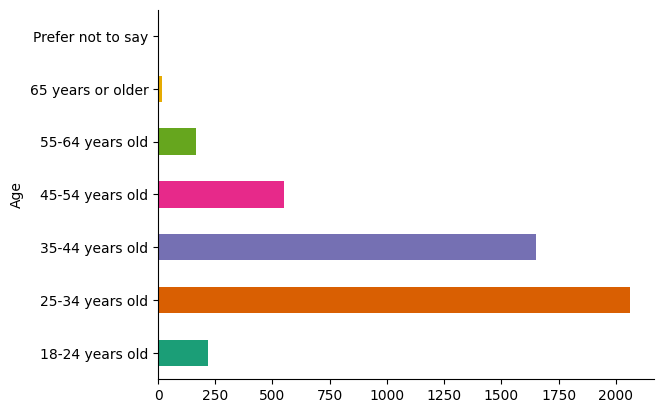

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_37.groupby('Age').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [36]:
#Filtering using multiple criteria and Negating a filter (everything except for the filtered criteria)
countries = ['United States of America','India','United Kingdom','Germany','Canada']
filt = df['Country'].isin(countries)
df.loc[filt,'Country']

1        United States of America
2        United States of America
3        United States of America
6        United States of America
7        United States of America
                   ...           
16459                     Germany
16460                     Germany
16480                       India
16481                     Germany
16499    United States of America
Name: Country, Length: 5791, dtype: object

In [37]:
#we want to derive the values of people who worked with Python, which could be a part of whole of each response

filt_python = df['LanguageHaveWorkedWith'].str.contains('Python', na = False)
#print (filt_python)


In [38]:
df.loc[filt_python,'LanguageHaveWorkedWith']
#Now you'll see all the results that has value Python in the responses

1                               HTML/CSS;JavaScript;Python
7        Go;HTML/CSS;JavaScript;Python;Rust;SQL;TypeScript
9           HTML/CSS;Java;JavaScript;Python;SQL;TypeScript
10                       C#;C++;HTML/CSS;JavaScript;Python
11       C#;HTML/CSS;JavaScript;Kotlin;PowerShell;Pytho...
                               ...                        
16485    Bash/Shell (all shells);C;C#;C++;Dart;HTML/CSS...
16486    Assembly;C;C#;C++;Java;MATLAB;Python;Visual Ba...
16492    C;C++;Cobol;HTML/CSS;Java;JavaScript;MATLAB;PH...
16497    Bash/Shell (all shells);HTML/CSS;JavaScript;Pe...
16498    Bash/Shell (all shells);C#;Python;Rust;TypeScript
Name: LanguageHaveWorkedWith, Length: 7983, dtype: object

In [39]:
#Modifying Columns-to see what data we have as columns
df.columns
#Renaming the Columns
#df.columns = ['changed name of the column1', 'changed name of column2'...]

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [41]:
#Renaming columns, putting them in upper case using list comprehension
df.columns = [x.upper() for x in df.columns]
df
df.columns = [x.title() for x in df.columns]
df
#Replacing spaces with Underscores
#df.columns = df.columns.str.replace (' ','_')

Responseid     Q120                      Mainbranch              Age  \
0               1  I agree                   None of these  18-24 years old   
1               2  I agree  I am a developer by profession  25-34 years old   
2               3  I agree  I am a developer by profession  45-54 years old   
3               4  I agree  I am a developer by profession  25-34 years old   
4               5  I agree  I am a developer by profession  25-34 years old   
...           ...      ...                             ...              ...   
16495       16496  I agree  I am a developer by profession  35-44 years old   
16496       16497  I agree  I am a developer by profession  45-54 years old   
16497       16498  I agree  I am a developer by profession  25-34 years old   
16498       16499  I agree  I am a developer by profession  25-34 years old   
16499       16500  I agree  I am a developer by profession  45-54 years old   

                                              Employment  \
0                                                    NaN   
1                                    Employed, full-time   
2                                    Employed, full-time   
3                                    Employed, full-time   
4      Employed, full-time;Independent contractor, fr...   
...                                                  ...   
16495                                Employed, full-time   
16496                                Employed, full-time   
16497                                Employed, full-time   
16498                                Employed, full-time   
16499                                Employed, full-time   

                                 Remotework  \
0                                       NaN   
1                                    Remote   
2      Hybrid (some remote, some in-person)   
3      Hybrid (some remote, some in-person)   
4                                    Remote   
...                                     ...   
16495  Hybrid (some remote, some in-person)   
16496  Hybrid (some remote, some in-person)   
16497                             In-person   
16498  Hybrid (some remote, some in-person)   
16499  Hybrid (some remote, some in-person)   

                                        Codingactivities  \
0                                                    NaN   
1      Hobby;Contribute to open-source projects;Boots...   
2      Hobby;Professional development or self-paced l...   
3                                                  Hobby   
4      Hobby;Contribute to open-source projects;Profe...   
...                                                  ...   
16495  Professional development or self-paced learnin...   
16496                                              Hobby   
16497  Hobby;Professional development or self-paced l...   
16498                                              Hobby   
16499  Hobby;Bootstrapping a business;Professional de...   

                                                 Edlevel  \
0                                                    NaN   
1           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
...                                                  ...   
16495    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
16496       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
16497     Professional degree (JD, MD, Ph.D, Ed.D, etc.)   
16498       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
16499  Some college/university study without earning ...   

                                               Learncode  \
0                                                    NaN   
1      Books / Physical media;Colleague;Friend or fam...   
2      Books / Physical media;Colleague;On the job tr...   
3      Colleague;Friend or family member;Other online...   
4      Books / Physical media;

from matplotlib import pyplot as plt
df['Responseid'].plot(kind='hist', bins=20, title='Responseid')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Comptotal'].plot(kind='hist', bins=20, title='Comptotal')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Workexp'].plot(kind='hist', bins=20, title='Workexp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Convertedcompyearly'].plot(kind='hist', bins=20, title='Convertedcompyearly')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Mainbranch').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Age').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Remotework').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Purchaseinfluence').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Responseid', y='Comptotal', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Comptotal', y='Workexp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Workexp', y='Convertedcompyearly', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Responseid']
  ys = series['Comptotal']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Responseid', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Mainbranch')):
  _plot_series(series, series_name, i)
  fig.legend(title='Mainbranch', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Responseid')
_ = plt.ylabel('Comptotal')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Responseid']
  ys = series['Comptotal']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Responseid', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Age')):
  _plot_series(series, series_name, i)
  fig.legend(title='Age', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Responseid')
_ = plt.ylabel('Comptotal')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Responseid']
  ys = series['Comptotal']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Responseid', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Remotework')):
  _plot_series(series, series_name, i)
  fig.legend(title='Remotework', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Responseid')
_ = plt.ylabel('Comptotal')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Responseid']
  ys = series['Comptotal']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Responseid', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Purchaseinfluence')):
  _plot_series(series, series_name, i)
  fig.legend(title='Purchaseinfluence', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Responseid')
_ = plt.ylabel('Comptotal')

from matplotlib import pyplot as plt
df['Responseid'].plot(kind='line', figsize=(8, 4), title='Responseid')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Comptotal'].plot(kind='line', figsize=(8, 4), title='Comptotal')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Workexp'].plot(kind='line', figsize=(8, 4), title='Workexp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Convertedcompyearly'].plot(kind='line', figsize=(8, 4), title='Convertedcompyearly')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Age'].value_counts()
    for x_label, grp in df.groupby('Mainbranch')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Mainbranch')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Remotework'].value_counts()
    for x_label, grp in df.groupby('Age')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Age')
_ = plt.ylabel('Remotework')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Purchaseinfluence'].value_counts()
    for x_label, grp in df.groupby('Remotework')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Remotework')
_ = plt.ylabel('Purchaseinfluence')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Techlist'].value_counts()
    for x_label, grp in df.groupby('Purchaseinfluence')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Purchaseinfluence')
_ = plt.ylabel('Techlist')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Mainbranch'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Responseid', y='Mainbranch', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Age'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Responseid', y='Age', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Remotework'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Responseid', y='Remotework', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Purchaseinfluence'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Responseid', y='Purchaseinfluence', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [42]:
#Renaming a set of columns using dictionary method
df.rename(columns={'Responseid':'ResId', 'Mainbranch':'MainBranch', 'Remotework':'RemoteWork'}, inplace = True)
df


ResId     Q120                      MainBranch              Age  \
0          1  I agree                   None of these  18-24 years old   
1          2  I agree  I am a developer by profession  25-34 years old   
2          3  I agree  I am a developer by profession  45-54 years old   
3          4  I agree  I am a developer by profession  25-34 years old   
4          5  I agree  I am a developer by profession  25-34 years old   
...      ...      ...                             ...              ...   
16495  16496  I agree  I am a developer by profession  35-44 years old   
16496  16497  I agree  I am a developer by profession  45-54 years old   
16497  16498  I agree  I am a developer by profession  25-34 years old   
16498  16499  I agree  I am a developer by profession  25-34 years old   
16499  16500  I agree  I am a developer by profession  45-54 years old   

                                              Employment  \
0                                                    NaN   
1                                    Employed, full-time   
2                                    Employed, full-time   
3                                    Employed, full-time   
4      Employed, full-time;Independent contractor, fr...   
...                                                  ...   
16495                                Employed, full-time   
16496                                Employed, full-time   
16497                                Employed, full-time   
16498                                Employed, full-time   
16499                                Employed, full-time   

                                 RemoteWork  \
0                                       NaN   
1                                    Remote   
2      Hybrid (some remote, some in-person)   
3      Hybrid (some remote, some in-person)   
4                                    Remote   
...                                     ...   
16495  Hybrid (some remote, some in-person)   
16496  Hybrid (some remote, some in-person)   
16497                             In-person   
16498  Hybrid (some remote, some in-person)   
16499  Hybrid (some remote, some in-person)   

                                        Codingactivities  \
0                                                    NaN   
1      Hobby;Contribute to open-source projects;Boots...   
2      Hobby;Professional development or self-paced l...   
3                                                  Hobby   
4      Hobby;Contribute to open-source projects;Profe...   
...                                                  ...   
16495  Professional development or self-paced learnin...   
16496                                              Hobby   
16497  Hobby;Professional development or self-paced l...   
16498                                              Hobby   
16499  Hobby;Bootstrapping a business;Professional de...   

                                                 Edlevel  \
0                                                    NaN   
1           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
...                                                  ...   
16495    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
16496       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
16497     Professional degree (JD, MD, Ph.D, Ed.D, etc.)   
16498       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
16499  Some college/university study without earning ...   

                                               Learncode  \
0                                                    NaN   
1      Books / Physical media;Colleague;Friend or fam...   
2      Books / Physical media;Colleague;On the job tr...   
3      Colleague;Friend or family member;Other online...   
4      Books / Physical media;Online Courses or Certi...   
...                           

from matplotlib import pyplot as plt
df['ResId'].plot(kind='hist', bins=20, title='ResId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Comptotal'].plot(kind='hist', bins=20, title='Comptotal')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Workexp'].plot(kind='hist', bins=20, title='Workexp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Convertedcompyearly'].plot(kind='hist', bins=20, title='Convertedcompyearly')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('MainBranch').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Age').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('RemoteWork').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Purchaseinfluence').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='ResId', y='Comptotal', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Comptotal', y='Workexp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Workexp', y='Convertedcompyearly', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ResId']
  ys = series['Comptotal']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('ResId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('MainBranch')):
  _plot_series(series, series_name, i)
  fig.legend(title='MainBranch', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ResId')
_ = plt.ylabel('Comptotal')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ResId']
  ys = series['Comptotal']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('ResId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Age')):
  _plot_series(series, series_name, i)
  fig.legend(title='Age', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ResId')
_ = plt.ylabel('Comptotal')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ResId']
  ys = series['Comptotal']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('ResId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('RemoteWork')):
  _plot_series(series, series_name, i)
  fig.legend(title='RemoteWork', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ResId')
_ = plt.ylabel('Comptotal')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ResId']
  ys = series['Comptotal']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('ResId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Purchaseinfluence')):
  _plot_series(series, series_name, i)
  fig.legend(title='Purchaseinfluence', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ResId')
_ = plt.ylabel('Comptotal')

from matplotlib import pyplot as plt
df['ResId'].plot(kind='line', figsize=(8, 4), title='ResId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Comptotal'].plot(kind='line', figsize=(8, 4), title='Comptotal')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Workexp'].plot(kind='line', figsize=(8, 4), title='Workexp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Convertedcompyearly'].plot(kind='line', figsize=(8, 4), title='Convertedcompyearly')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Age'].value_counts()
    for x_label, grp in df.groupby('MainBranch')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('MainBranch')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['RemoteWork'].value_counts()
    for x_label, grp in df.groupby('Age')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Age')
_ = plt.ylabel('RemoteWork')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Purchaseinfluence'].value_counts()
    for x_label, grp in df.groupby('RemoteWork')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('RemoteWork')
_ = plt.ylabel('Purchaseinfluence')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Techlist'].value_counts()
    for x_label, grp in df.groupby('Purchaseinfluence')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Purchaseinfluence')
_ = plt.ylabel('Techlist')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['MainBranch'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ResId', y='MainBranch', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Age'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ResId', y='Age', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['RemoteWork'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ResId', y='RemoteWork', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Purchaseinfluence'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ResId', y='Purchaseinfluence', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [43]:
df.columns

Index(['ResId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'Codingactivities', 'Edlevel', 'Learncode', 'Learncodeonline',
       'Learncodecoursescert', 'Yearscode', 'Yearscodepro', 'Devtype',
       'Orgsize', 'Purchaseinfluence', 'Techlist', 'Buynewtool', 'Country',
       'Currency', 'Comptotal', 'Languagehaveworkedwith',
       'Languagewanttoworkwith', 'Databasehaveworkedwith',
       'Databasewanttoworkwith', 'Platformhaveworkedwith',
       'Platformwanttoworkwith', 'Webframehaveworkedwith',
       'Webframewanttoworkwith', 'Misctechhaveworkedwith',
       'Misctechwanttoworkwith', 'Toolstechhaveworkedwith',
       'Toolstechwanttoworkwith', 'Newcollabtoolshaveworkedwith',
       'Newcollabtoolswanttoworkwith', 'Opsyspersonal Use',
       'Opsysprofessional Use', 'Officestackasynchaveworkedwith',
       'Officestackasyncwanttoworkwith', 'Officestacksynchaveworkedwith',
       'Officestacksyncwanttoworkwith', 'Aisearchhaveworkedwith',
       'Aisearchwanttowo

In [44]:
#Using Index values
df.loc[2]
#We are looking at updating MainBranch, Remotework  for this repondent
df.loc[2,['MainBranch','RemoteWork']] = ['Nonw of these','Remote']
df

ResId     Q120                      MainBranch              Age  \
0          1  I agree                   None of these  18-24 years old   
1          2  I agree  I am a developer by profession  25-34 years old   
2          3  I agree                   Nonw of these  45-54 years old   
3          4  I agree  I am a developer by profession  25-34 years old   
4          5  I agree  I am a developer by profession  25-34 years old   
...      ...      ...                             ...              ...   
16495  16496  I agree  I am a developer by profession  35-44 years old   
16496  16497  I agree  I am a developer by profession  45-54 years old   
16497  16498  I agree  I am a developer by profession  25-34 years old   
16498  16499  I agree  I am a developer by profession  25-34 years old   
16499  16500  I agree  I am a developer by profession  45-54 years old   

                                              Employment  \
0                                                    NaN   
1                                    Employed, full-time   
2                                    Employed, full-time   
3                                    Employed, full-time   
4      Employed, full-time;Independent contractor, fr...   
...                                                  ...   
16495                                Employed, full-time   
16496                                Employed, full-time   
16497                                Employed, full-time   
16498                                Employed, full-time   
16499                                Employed, full-time   

                                 RemoteWork  \
0                                       NaN   
1                                    Remote   
2                                    Remote   
3      Hybrid (some remote, some in-person)   
4                                    Remote   
...                                     ...   
16495  Hybrid (some remote, some in-person)   
16496  Hybrid (some remote, some in-person)   
16497                             In-person   
16498  Hybrid (some remote, some in-person)   
16499  Hybrid (some remote, some in-person)   

                                        Codingactivities  \
0                                                    NaN   
1      Hobby;Contribute to open-source projects;Boots...   
2      Hobby;Professional development or self-paced l...   
3                                                  Hobby   
4      Hobby;Contribute to open-source projects;Profe...   
...                                                  ...   
16495  Professional development or self-paced learnin...   
16496                                              Hobby   
16497  Hobby;Professional development or self-paced l...   
16498                                              Hobby   
16499  Hobby;Bootstrapping a business;Professional de...   

                                                 Edlevel  \
0                                                    NaN   
1           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
...                                                  ...   
16495    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
16496       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
16497     Professional degree (JD, MD, Ph.D, Ed.D, etc.)   
16498       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
16499  Some college/university study without earning ...   

                                               Learncode  \
0                                                    NaN   
1      Books / Physical media;Colleague;Friend or fam...   
2      Books / Physical media;Colleague;On the job tr...   
3      Colleague;Friend or family member;Other online...   
4      Books / Physical media;Online Courses or Certi...   
...                           

from matplotlib import pyplot as plt
df['ResId'].plot(kind='hist', bins=20, title='ResId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Comptotal'].plot(kind='hist', bins=20, title='Comptotal')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Workexp'].plot(kind='hist', bins=20, title='Workexp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Convertedcompyearly'].plot(kind='hist', bins=20, title='Convertedcompyearly')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('MainBranch').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Age').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('RemoteWork').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Purchaseinfluence').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='ResId', y='Comptotal', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Comptotal', y='Workexp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Workexp', y='Convertedcompyearly', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ResId']
  ys = series['Comptotal']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('ResId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('MainBranch')):
  _plot_series(series, series_name, i)
  fig.legend(title='MainBranch', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ResId')
_ = plt.ylabel('Comptotal')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ResId']
  ys = series['Comptotal']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('ResId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Age')):
  _plot_series(series, series_name, i)
  fig.legend(title='Age', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ResId')
_ = plt.ylabel('Comptotal')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ResId']
  ys = series['Comptotal']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('ResId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('RemoteWork')):
  _plot_series(series, series_name, i)
  fig.legend(title='RemoteWork', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ResId')
_ = plt.ylabel('Comptotal')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ResId']
  ys = series['Comptotal']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('ResId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Purchaseinfluence')):
  _plot_series(series, series_name, i)
  fig.legend(title='Purchaseinfluence', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ResId')
_ = plt.ylabel('Comptotal')

from matplotlib import pyplot as plt
df['ResId'].plot(kind='line', figsize=(8, 4), title='ResId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Comptotal'].plot(kind='line', figsize=(8, 4), title='Comptotal')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Workexp'].plot(kind='line', figsize=(8, 4), title='Workexp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Convertedcompyearly'].plot(kind='line', figsize=(8, 4), title='Convertedcompyearly')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Age'].value_counts()
    for x_label, grp in df.groupby('MainBranch')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('MainBranch')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['RemoteWork'].value_counts()
    for x_label, grp in df.groupby('Age')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Age')
_ = plt.ylabel('RemoteWork')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Purchaseinfluence'].value_counts()
    for x_label, grp in df.groupby('RemoteWork')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('RemoteWork')
_ = plt.ylabel('Purchaseinfluence')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Techlist'].value_counts()
    for x_label, grp in df.groupby('Purchaseinfluence')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Purchaseinfluence')
_ = plt.ylabel('Techlist')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['MainBranch'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ResId', y='MainBranch', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Age'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ResId', y='Age', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['RemoteWork'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ResId', y='RemoteWork', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Purchaseinfluence'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ResId', y='Purchaseinfluence', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
#for changing a single value in rows
df.loc[2,'Codingactivities'] = 'Hobby'
df
#or for single values explore .at instead of .loc df.at[2,'Codingactivities'] = 'Hobby'

In [ ]:
#Updating row using a filter, still advisable to use.loc


In [ ]:
#Map

#df['RemoteWork'] = df['RemoteWork'].map({'Hybrid (some remote, some in-person)':'Hybrid','In-person':'Offline'})
#Using Replace
df['RemoteWork'] = df['RemoteWork'].replace({'Hybrid (some remote, some in-person)':'Hybrid','In-person':'Offline'})
#* All other values without mapping and turned to none
#REPLACE is a better option when you want to change only few of the given responses in a column


In [ ]:
df

In [45]:
df.head(10)
#Adding columns
df['Emp_Mode'] = df['Employment']+ '-' + df['RemoteWork']
df['Emp_Mode']
#df.drop (columns=['Employment','RemoteWork]) will remove the old columns

0                                                      NaN
1                               Employed, full-time-Remote
2                               Employed, full-time-Remote
3        Employed, full-time-Hybrid (some remote, some ...
4        Employed, full-time;Independent contractor, fr...
                               ...                        
16495    Employed, full-time-Hybrid (some remote, some ...
16496    Employed, full-time-Hybrid (some remote, some ...
16497                        Employed, full-time-In-person
16498    Employed, full-time-Hybrid (some remote, some ...
16499    Employed, full-time-Hybrid (some remote, some ...
Name: Emp_Mode, Length: 16500, dtype: object

In [46]:
#Ignore Index-Adding rows using dictionariesr
df.append({'Age':'Not Available'}, ignore_index = True)
df

<ipython-input-46-9ba17262b002>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append({'Age':'Not Available'}, ignore_index = True)


ResId     Q120                      MainBranch              Age  \
0          1  I agree                   None of these  18-24 years old   
1          2  I agree  I am a developer by profession  25-34 years old   
2          3  I agree                   Nonw of these  45-54 years old   
3          4  I agree  I am a developer by profession  25-34 years old   
4          5  I agree  I am a developer by profession  25-34 years old   
...      ...      ...                             ...              ...   
16495  16496  I agree  I am a developer by profession  35-44 years old   
16496  16497  I agree  I am a developer by profession  45-54 years old   
16497  16498  I agree  I am a developer by profession  25-34 years old   
16498  16499  I agree  I am a developer by profession  25-34 years old   
16499  16500  I agree  I am a developer by profession  45-54 years old   

                                              Employment  \
0                                                    NaN   
1                                    Employed, full-time   
2                                    Employed, full-time   
3                                    Employed, full-time   
4      Employed, full-time;Independent contractor, fr...   
...                                                  ...   
16495                                Employed, full-time   
16496                                Employed, full-time   
16497                                Employed, full-time   
16498                                Employed, full-time   
16499                                Employed, full-time   

                                 RemoteWork  \
0                                       NaN   
1                                    Remote   
2                                    Remote   
3      Hybrid (some remote, some in-person)   
4                                    Remote   
...                                     ...   
16495  Hybrid (some remote, some in-person)   
16496  Hybrid (some remote, some in-person)   
16497                             In-person   
16498  Hybrid (some remote, some in-person)   
16499  Hybrid (some remote, some in-person)   

                                        Codingactivities  \
0                                                    NaN   
1      Hobby;Contribute to open-source projects;Boots...   
2      Hobby;Professional development or self-paced l...   
3                                                  Hobby   
4      Hobby;Contribute to open-source projects;Profe...   
...                                                  ...   
16495  Professional development or self-paced learnin...   
16496                                              Hobby   
16497  Hobby;Professional development or self-paced l...   
16498                                              Hobby   
16499  Hobby;Bootstrapping a business;Professional de...   

                                                 Edlevel  \
0                                                    NaN   
1           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
...                                                  ...   
16495    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
16496       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
16497     Professional degree (JD, MD, Ph.D, Ed.D, etc.)   
16498       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
16499  Some college/university study without earning ...   

                                               Learncode  \
0                                                    NaN   
1      Books / Physical media;Colleague;Friend or fam...   
2      Books / Physical media;Colleague;On the job tr...   
3      Colleague;Friend or family member;Other online...   
4      Books / Physical media;Online Courses or Certi...   
...                           

from matplotlib import pyplot as plt
df['ResId'].plot(kind='hist', bins=20, title='ResId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Comptotal'].plot(kind='hist', bins=20, title='Comptotal')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Workexp'].plot(kind='hist', bins=20, title='Workexp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Convertedcompyearly'].plot(kind='hist', bins=20, title='Convertedcompyearly')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('MainBranch').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Age').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('RemoteWork').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Purchaseinfluence').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='ResId', y='Comptotal', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Comptotal', y='Workexp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Workexp', y='Convertedcompyearly', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ResId']
  ys = series['Comptotal']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('ResId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('MainBranch')):
  _plot_series(series, series_name, i)
  fig.legend(title='MainBranch', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ResId')
_ = plt.ylabel('Comptotal')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ResId']
  ys = series['Comptotal']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('ResId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Age')):
  _plot_series(series, series_name, i)
  fig.legend(title='Age', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ResId')
_ = plt.ylabel('Comptotal')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ResId']
  ys = series['Comptotal']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('ResId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('RemoteWork')):
  _plot_series(series, series_name, i)
  fig.legend(title='RemoteWork', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ResId')
_ = plt.ylabel('Comptotal')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ResId']
  ys = series['Comptotal']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('ResId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Purchaseinfluence')):
  _plot_series(series, series_name, i)
  fig.legend(title='Purchaseinfluence', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ResId')
_ = plt.ylabel('Comptotal')

from matplotlib import pyplot as plt
df['ResId'].plot(kind='line', figsize=(8, 4), title='ResId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Comptotal'].plot(kind='line', figsize=(8, 4), title='Comptotal')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Workexp'].plot(kind='line', figsize=(8, 4), title='Workexp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Convertedcompyearly'].plot(kind='line', figsize=(8, 4), title='Convertedcompyearly')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Age'].value_counts()
    for x_label, grp in df.groupby('MainBranch')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('MainBranch')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['RemoteWork'].value_counts()
    for x_label, grp in df.groupby('Age')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Age')
_ = plt.ylabel('RemoteWork')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Purchaseinfluence'].value_counts()
    for x_label, grp in df.groupby('RemoteWork')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('RemoteWork')
_ = plt.ylabel('Purchaseinfluence')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Techlist'].value_counts()
    for x_label, grp in df.groupby('Purchaseinfluence')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Purchaseinfluence')
_ = plt.ylabel('Techlist')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['MainBranch'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ResId', y='MainBranch', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Age'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ResId', y='Age', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['RemoteWork'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ResId', y='RemoteWork', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Purchaseinfluence'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ResId', y='Purchaseinfluence', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [48]:
df.append({'Age':'Not Available'}, ignore_index = True, sort = False)
df = df.append({'Age':'Not Available'}, ignore_index = True, sort = False)
df

<ipython-input-48-356bc7dc41b3>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append({'Age':'Not Available'}, ignore_index = True, sort = False)
<ipython-input-48-356bc7dc41b3>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Age':'Not Available'}, ignore_index = True, sort = False)


ResId     Q120                      MainBranch              Age  \
0          1.0  I agree                   None of these  18-24 years old   
1          2.0  I agree  I am a developer by profession  25-34 years old   
2          3.0  I agree                   Nonw of these  45-54 years old   
3          4.0  I agree  I am a developer by profession  25-34 years old   
4          5.0  I agree  I am a developer by profession  25-34 years old   
...        ...      ...                             ...              ...   
16497  16498.0  I agree  I am a developer by profession  25-34 years old   
16498  16499.0  I agree  I am a developer by profession  25-34 years old   
16499  16500.0  I agree  I am a developer by profession  45-54 years old   
16500      NaN      NaN                             NaN    Not Available   
16501      NaN      NaN                             NaN    Not Available   

                                              Employment  \
0                                                    NaN   
1                                    Employed, full-time   
2                                    Employed, full-time   
3                                    Employed, full-time   
4      Employed, full-time;Independent contractor, fr...   
...                                                  ...   
16497                                Employed, full-time   
16498                                Employed, full-time   
16499                                Employed, full-time   
16500                                                NaN   
16501                                                NaN   

                                 RemoteWork  \
0                                       NaN   
1                                    Remote   
2                                    Remote   
3      Hybrid (some remote, some in-person)   
4                                    Remote   
...                                     ...   
16497                             In-person   
16498  Hybrid (some remote, some in-person)   
16499  Hybrid (some remote, some in-person)   
16500                                   NaN   
16501                                   NaN   

                                        Codingactivities  \
0                                                    NaN   
1      Hobby;Contribute to open-source projects;Boots...   
2      Hobby;Professional development or self-paced l...   
3                                                  Hobby   
4      Hobby;Contribute to open-source projects;Profe...   
...                                                  ...   
16497  Hobby;Professional development or self-paced l...   
16498                                              Hobby   
16499  Hobby;Bootstrapping a business;Professional de...   
16500                                                NaN   
16501                                                NaN   

                                                 Edlevel  \
0                                                    NaN   
1           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
...                                                  ...   
16497     Professional degree (JD, MD, Ph.D, Ed.D, etc.)   
16498       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
16499  Some college/university study without earning ...   
16500                                                NaN   
16501                                                NaN   

                                               Learncode  \
0                                                    NaN   
1      Books / Physical media;Colleague;Friend or fam...   
2      Books / Physical media;Colleague;On the job tr...   
3      Colleague;Friend or family member;Other online...   
4      Books / Physical media;Online Courses or Certi...   
...     

from matplotlib import pyplot as plt
df['ResId'].plot(kind='hist', bins=20, title='ResId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Comptotal'].plot(kind='hist', bins=20, title='Comptotal')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Workexp'].plot(kind='hist', bins=20, title='Workexp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Convertedcompyearly'].plot(kind='hist', bins=20, title='Convertedcompyearly')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Q120').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('MainBranch').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('RemoteWork').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Purchaseinfluence').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='ResId', y='Comptotal', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Comptotal', y='Workexp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Workexp', y='Convertedcompyearly', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

TypeError: 'value' must be an instance of str or bytes, not a float

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timesearching']
  ys = series['ResId']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Timesearching', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Q120')):
  _plot_series(series, series_name, i)
  fig.legend(title='Q120', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timesearching')
_ = plt.ylabel('ResId')

TypeError: 'value' must be an instance of str or bytes, not a float

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timesearching']
  ys = series['ResId']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Timesearching', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('MainBranch')):
  _plot_series(series, series_name, i)
  fig.legend(title='MainBranch', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timesearching')
_ = plt.ylabel('ResId')

TypeError: 'value' must be an instance of str or bytes, not a float

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timesearching']
  ys = series['ResId']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Timesearching', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('RemoteWork')):
  _plot_series(series, series_name, i)
  fig.legend(title='RemoteWork', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timesearching')
_ = plt.ylabel('ResId')

TypeError: 'value' must be an instance of str or bytes, not a float

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timesearching']
  ys = series['ResId']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Timesearching', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Purchaseinfluence')):
  _plot_series(series, series_name, i)
  fig.legend(title='Purchaseinfluence', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timesearching')
_ = plt.ylabel('ResId')

from matplotlib import pyplot as plt
df['ResId'].plot(kind='line', figsize=(8, 4), title='ResId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Comptotal'].plot(kind='line', figsize=(8, 4), title='Comptotal')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Workexp'].plot(kind='line', figsize=(8, 4), title='Workexp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Convertedcompyearly'].plot(kind='line', figsize=(8, 4), title='Convertedcompyearly')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['MainBranch'].value_counts()
    for x_label, grp in df.groupby('Q120')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Q120')
_ = plt.ylabel('MainBranch')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['RemoteWork'].value_counts()
    for x_label, grp in df.groupby('MainBranch')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('MainBranch')
_ = plt.ylabel('RemoteWork')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Purchaseinfluence'].value_counts()
    for x_label, grp in df.groupby('RemoteWork')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('RemoteWork')
_ = plt.ylabel('Purchaseinfluence')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Techlist'].value_counts()
    for x_label, grp in df.groupby('Purchaseinfluence')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Purchaseinfluence')
_ = plt.ylabel('Techlist')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Q120'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ResId', y='Q120', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['MainBranch'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ResId', y='MainBranch', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['RemoteWork'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ResId', y='RemoteWork', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Purchaseinfluence'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ResId', y='Purchaseinfluence', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [50]:
#Removing Rows
df.drop(index=4)
df


<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Q120'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ResId', y='Q120', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['MainBranch'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ResId', y='MainBranch', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['RemoteWork'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ResId', y='RemoteWork', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Purchaseinfluence'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ResId', y='Purchaseinfluence', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

ResId     Q120                      MainBranch              Age  \
0          1.0  I agree                   None of these  18-24 years old   
1          2.0  I agree  I am a developer by profession  25-34 years old   
2          3.0  I agree                   Nonw of these  45-54 years old   
3          4.0  I agree  I am a developer by profession  25-34 years old   
4          5.0  I agree  I am a developer by profession  25-34 years old   
...        ...      ...                             ...              ...   
16497  16498.0  I agree  I am a developer by profession  25-34 years old   
16498  16499.0  I agree  I am a developer by profession  25-34 years old   
16499  16500.0  I agree  I am a developer by profession  45-54 years old   
16500      NaN      NaN                             NaN    Not Available   
16501      NaN      NaN                             NaN    Not Available   

                                              Employment  \
0                                                    NaN   
1                                    Employed, full-time   
2                                    Employed, full-time   
3                                    Employed, full-time   
4      Employed, full-time;Independent contractor, fr...   
...                                                  ...   
16497                                Employed, full-time   
16498                                Employed, full-time   
16499                                Employed, full-time   
16500                                                NaN   
16501                                                NaN   

                                 RemoteWork  \
0                                       NaN   
1                                    Remote   
2                                    Remote   
3      Hybrid (some remote, some in-person)   
4                                    Remote   
...                                     ...   
16497                             In-person   
16498  Hybrid (some remote, some in-person)   
16499  Hybrid (some remote, some in-person)   
16500                                   NaN   
16501                                   NaN   

                                        Codingactivities  \
0                                                    NaN   
1      Hobby;Contribute to open-source projects;Boots...   
2      Hobby;Professional development or self-paced l...   
3                                                  Hobby   
4      Hobby;Contribute to open-source projects;Profe...   
...                                                  ...   
16497  Hobby;Professional development or self-paced l...   
16498                                              Hobby   
16499  Hobby;Bootstrapping a business;Professional de...   
16500                                                NaN   
16501                                                NaN   

                                                 Edlevel  \
0                                                    NaN   
1           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
...                                                  ...   
16497     Professional degree (JD, MD, Ph.D, Ed.D, etc.)   
16498       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
16499  Some college/university study without earning ...   
16500                                                NaN   
16501                                                NaN   

                                               Learncode  \
0                                                    NaN   
1      Books / Physical media;Colleague;Friend or fam...   
2      Books / Physical media;Colleague;On the job tr...   
3      Colleague;Friend or family member;Other online...   
4      Books / Physical media;Online Courses or Certi...   
...     

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['RemoteWork'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ResId', y='RemoteWork', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [51]:
filt = df['Age']=='18-24 years old'
df.drop(index=df[filt].index)
df=df.drop(index=df[filt].index)
df

ResId     Q120                      MainBranch              Age  \
1          2.0  I agree  I am a developer by profession  25-34 years old   
2          3.0  I agree                   Nonw of these  45-54 years old   
3          4.0  I agree  I am a developer by profession  25-34 years old   
4          5.0  I agree  I am a developer by profession  25-34 years old   
5          6.0  I agree  I am a developer by profession  35-44 years old   
...        ...      ...                             ...              ...   
16497  16498.0  I agree  I am a developer by profession  25-34 years old   
16498  16499.0  I agree  I am a developer by profession  25-34 years old   
16499  16500.0  I agree  I am a developer by profession  45-54 years old   
16500      NaN      NaN                             NaN    Not Available   
16501      NaN      NaN                             NaN    Not Available   

                                              Employment  \
1                                    Employed, full-time   
2                                    Employed, full-time   
3                                    Employed, full-time   
4      Employed, full-time;Independent contractor, fr...   
5                                    Employed, full-time   
...                                                  ...   
16497                                Employed, full-time   
16498                                Employed, full-time   
16499                                Employed, full-time   
16500                                                NaN   
16501                                                NaN   

                                 RemoteWork  \
1                                    Remote   
2                                    Remote   
3      Hybrid (some remote, some in-person)   
4                                    Remote   
5                                    Remote   
...                                     ...   
16497                             In-person   
16498  Hybrid (some remote, some in-person)   
16499  Hybrid (some remote, some in-person)   
16500                                   NaN   
16501                                   NaN   

                                        Codingactivities  \
1      Hobby;Contribute to open-source projects;Boots...   
2      Hobby;Professional development or self-paced l...   
3                                                  Hobby   
4      Hobby;Contribute to open-source projects;Profe...   
5      Hobby;Professional development or self-paced l...   
...                                                  ...   
16497  Hobby;Professional development or self-paced l...   
16498                                              Hobby   
16499  Hobby;Bootstrapping a business;Professional de...   
16500                                                NaN   
16501                                                NaN   

                                                 Edlevel  \
1           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
5      Some college/university study without earning ...   
...                                                  ...   
16497     Professional degree (JD, MD, Ph.D, Ed.D, etc.)   
16498       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
16499  Some college/university study without earning ...   
16500                                                NaN   
16501                                                NaN   

                                               Learncode  \
1      Books / Physical media;Colleague;Friend or fam...   
2      Books / Physical media;Colleague;On the job tr...   
3      Colleague;Friend or family member;Other online...   
4      Books / Physical media;Online Courses or Certi...   
5      Books / Physical media;Colleague;Online Course...   
...     

In [53]:
df.sort_values(by='Employment', ascending=False)
df

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Age'].value_counts()
    for x_label, grp in df.groupby('MainBranch')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('MainBranch')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['RemoteWork'].value_counts()
    for x_label, grp in df.groupby('Age')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Age')
_ = plt.ylabel('RemoteWork')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Purchaseinfluence'].value_counts()
    for x_label, grp in df.groupby('RemoteWork')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('RemoteWork')
_ = plt.ylabel('Purchaseinfluence')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Q120'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ResId', y='Q120', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['MainBranch'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ResId', y='MainBranch', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Age'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ResId', y='Age', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['RemoteWork'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ResId', y='RemoteWork', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

ResId     Q120                      MainBranch              Age  \
1          2.0  I agree  I am a developer by profession  25-34 years old   
2          3.0  I agree                   Nonw of these  45-54 years old   
3          4.0  I agree  I am a developer by profession  25-34 years old   
4          5.0  I agree  I am a developer by profession  25-34 years old   
5          6.0  I agree  I am a developer by profession  35-44 years old   
...        ...      ...                             ...              ...   
16497  16498.0  I agree  I am a developer by profession  25-34 years old   
16498  16499.0  I agree  I am a developer by profession  25-34 years old   
16499  16500.0  I agree  I am a developer by profession  45-54 years old   
16500      NaN      NaN                             NaN    Not Available   
16501      NaN      NaN                             NaN    Not Available   

                                              Employment  \
1                                    Employed, full-time   
2                                    Employed, full-time   
3                                    Employed, full-time   
4      Employed, full-time;Independent contractor, fr...   
5                                    Employed, full-time   
...                                                  ...   
16497                                Employed, full-time   
16498                                Employed, full-time   
16499                                Employed, full-time   
16500                                                NaN   
16501                                                NaN   

                                 RemoteWork  \
1                                    Remote   
2                                    Remote   
3      Hybrid (some remote, some in-person)   
4                                    Remote   
5                                    Remote   
...                                     ...   
16497                             In-person   
16498  Hybrid (some remote, some in-person)   
16499  Hybrid (some remote, some in-person)   
16500                                   NaN   
16501                                   NaN   

                                        Codingactivities  \
1      Hobby;Contribute to open-source projects;Boots...   
2      Hobby;Professional development or self-paced l...   
3                                                  Hobby   
4      Hobby;Contribute to open-source projects;Profe...   
5      Hobby;Professional development or self-paced l...   
...                                                  ...   
16497  Hobby;Professional development or self-paced l...   
16498                                              Hobby   
16499  Hobby;Bootstrapping a business;Professional de...   
16500                                                NaN   
16501                                                NaN   

                                                 Edlevel  \
1           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
5      Some college/university study without earning ...   
...                                                  ...   
16497     Professional degree (JD, MD, Ph.D, Ed.D, etc.)   
16498       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
16499  Some college/university study without earning ...   
16500                                                NaN   
16501                                                NaN   

                                               Learncode  \
1      Books / Physical media;Colleague;Friend or fam...   
2      Books / Physical media;Colleague;On the job tr...   
3      Colleague;Friend or family member;Other online...   
4      Books / Physical media;Online Courses or Certi...   
5      Books / Physical media;Colleague;Online Course...   
...     

In [ ]:
df.sort_values(by=['Employment','CodingActivities'], ascending = [False, True], inplace = True)
df #sort Employment by Desc and Coding activities by Ascending

ResponseId     Q120                                         MainBranch  \
1451       1452.0  I agree                        I code primarily as a hobby   
1703       1704.0  I agree                        I code primarily as a hobby   
1758       1759.0  I agree                              I am learning to code   
2949       2950.0  I agree                        I code primarily as a hobby   
3671       3672.0  I agree  I am not primarily a developer, but I write co...   
...           ...      ...                                                ...   
21350     21351.0  I agree                                      None of these   
21470     21471.0  I agree                        I code primarily as a hobby   
21628     21629.0  I agree                                      None of these   
21653     21654.0  I agree                              I am learning to code   
21770         NaN      NaN                                                NaN   

                      Age                                         Employment  \
1451   Under 18 years old  Student, part-time;Not employed, and not looki...   
1703   Under 18 years old  Student, part-time;Not employed, and not looki...   
1758    Prefer not to say  Student, part-time;Not employed, and not looki...   
2949    Prefer not to say  Student, part-time;Not employed, and not looki...   
3671   Under 18 years old  Student, part-time;Not employed, and not looki...   
...                   ...                                                ...   
21350     55-64 years old                                                NaN   
21470  Under 18 years old                                                NaN   
21628     25-34 years old                                                NaN   
21653   Prefer not to say                                                NaN   
21770       Not Available                                                NaN   

      RemoteWork CodingActivities  \
1451         NaN              NaN   
1703         NaN              NaN   
1758         NaN              NaN   
2949         NaN              NaN   
3671         NaN              NaN   
...          ...              ...   
21350        NaN              NaN   
21470        NaN              NaN   
21628        NaN              NaN   
21653        NaN              NaN   
21770        NaN              NaN   

                                                 EdLevel  \
1451                           Primary/elementary school   
1703   Secondary school (e.g. American high school, G...   
1758   Secondary school (e.g. American high school, G...   
2949   Secondary school (e.g. American high school, G...   
3671   Some college/university study without earning ...   
...                                                  ...   
21350                                                NaN   
21470  Secondary school (e.g. American high school, G...   
21628                                                NaN   
21653                                     Something else   
21770                                                NaN   

                                               LearnCode  \
1451   Friend or family member;Online Courses or Cert...   
1703   Hackathons (virtual or in-person);Online Cours...   
1758                             Other (please specify):   
2949   Books / Physical media;Friend or family member...   
3671   Online Courses or Certification;On the job tra...   
...                                                  ...   
21350                                                NaN   
21470  Other online resources (e.g., videos, blogs, f...   
21628                                                NaN   
21653  Books / Physical media;Other online resources ...   
21770                                                NaN   

                                         LearnCodeOnline  ... Frequency_1  \
1451   Formal documentation provided by the owner of ...  ...         NaN   
1703   Formal documentation prov

In [56]:
df['Age'].sort_values()
df

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Age'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ResId', y='Age', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['RemoteWork'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ResId', y='RemoteWork', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

ResId     Q120                      MainBranch              Age  \
1          2.0  I agree  I am a developer by profession  25-34 years old   
2          3.0  I agree                   Nonw of these  45-54 years old   
3          4.0  I agree  I am a developer by profession  25-34 years old   
4          5.0  I agree  I am a developer by profession  25-34 years old   
5          6.0  I agree  I am a developer by profession  35-44 years old   
...        ...      ...                             ...              ...   
16497  16498.0  I agree  I am a developer by profession  25-34 years old   
16498  16499.0  I agree  I am a developer by profession  25-34 years old   
16499  16500.0  I agree  I am a developer by profession  45-54 years old   
16500      NaN      NaN                             NaN    Not Available   
16501      NaN      NaN                             NaN    Not Available   

                                              Employment  \
1                                    Employed, full-time   
2                                    Employed, full-time   
3                                    Employed, full-time   
4      Employed, full-time;Independent contractor, fr...   
5                                    Employed, full-time   
...                                                  ...   
16497                                Employed, full-time   
16498                                Employed, full-time   
16499                                Employed, full-time   
16500                                                NaN   
16501                                                NaN   

                                 RemoteWork  \
1                                    Remote   
2                                    Remote   
3      Hybrid (some remote, some in-person)   
4                                    Remote   
5                                    Remote   
...                                     ...   
16497                             In-person   
16498  Hybrid (some remote, some in-person)   
16499  Hybrid (some remote, some in-person)   
16500                                   NaN   
16501                                   NaN   

                                        Codingactivities  \
1      Hobby;Contribute to open-source projects;Boots...   
2      Hobby;Professional development or self-paced l...   
3                                                  Hobby   
4      Hobby;Contribute to open-source projects;Profe...   
5      Hobby;Professional development or self-paced l...   
...                                                  ...   
16497  Hobby;Professional development or self-paced l...   
16498                                              Hobby   
16499  Hobby;Bootstrapping a business;Professional de...   
16500                                                NaN   
16501                                                NaN   

                                                 Edlevel  \
1           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
5      Some college/university study without earning ...   
...                                                  ...   
16497     Professional degree (JD, MD, Ph.D, Ed.D, etc.)   
16498       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
16499  Some college/university study without earning ...   
16500                                                NaN   
16501                                                NaN   

                                               Learncode  \
1      Books / Physical media;Colleague;Friend or fam...   
2      Books / Physical media;Colleague;On the job tr...   
3      Colleague;Friend or family member;Other online...   
4      Books / Physical media;Online Courses or Certi...   
5      Books / Physical media;Colleague;Online Course...   
...     

<ipython-input-57-fee32febcd8f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='ResId', y='RemoteWork', inner='box', palette='Dark2')


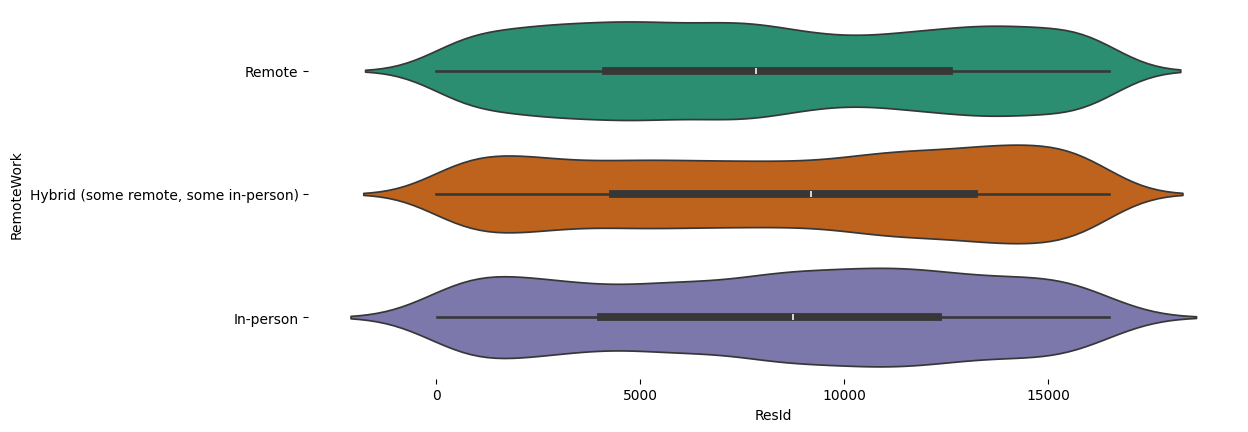

In [57]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['RemoteWork'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ResId', y='RemoteWork', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df.nsmallest(10, 'ConvertedCompYearly') #tp obtaine complete records based on the criteria

In [61]:
df.median()

<ipython-input-61-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


ResId                    8359.0
Comptotal              118000.0
Workexp                    10.0
Convertedcompyearly     74963.0
dtype: float64

In [62]:
#For getting a broad statistical overview
df.describe()

ResId     Comptotal      Workexp  Convertedcompyearly
count  13279.000000  8.261000e+03  7532.000000         8.226000e+03
mean    8360.645154  5.692517e+08    11.980882         9.584972e+04
std     4840.806446  5.025812e+10     8.388056         1.378574e+05
min        2.000000  0.000000e+00     0.000000         1.000000e+00
25%     4128.500000  6.400000e+04     6.000000         4.800000e+04
50%     8359.000000  1.180000e+05    10.000000         7.496300e+04
75%    12671.500000  2.500000e+05    16.000000         1.179310e+05
max    16500.000000  4.567887e+12    50.000000         9.000000e+06

from matplotlib import pyplot as plt
_df_38['ResId'].plot(kind='hist', bins=20, title='ResId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39['Comptotal'].plot(kind='hist', bins=20, title='Comptotal')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_40['Workexp'].plot(kind='hist', bins=20, title='Workexp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_41['Convertedcompyearly'].plot(kind='hist', bins=20, title='Convertedcompyearly')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_42.plot(kind='scatter', x='ResId', y='Comptotal', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_43.plot(kind='scatter', x='Comptotal', y='Workexp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_44.plot(kind='scatter', x='Workexp', y='Convertedcompyearly', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_45['ResId'].plot(kind='line', figsize=(8, 4), title='ResId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46['Comptotal'].plot(kind='line', figsize=(8, 4), title='Comptotal')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_47['Workexp'].plot(kind='line', figsize=(8, 4), title='Workexp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_48['Convertedcompyearly'].plot(kind='line', figsize=(8, 4), title='Convertedcompyearly')
plt.gca().spines[['top', 'right']].set_visible(False)

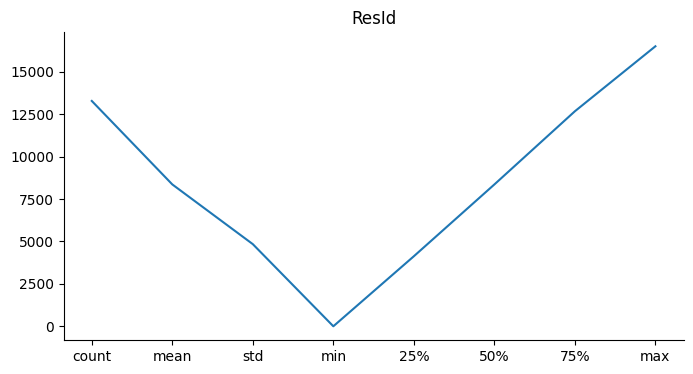

In [63]:
from matplotlib import pyplot as plt
_df_45['ResId'].plot(kind='line', figsize=(8, 4), title='ResId')
plt.gca().spines[['top', 'right']].set_visible(False)

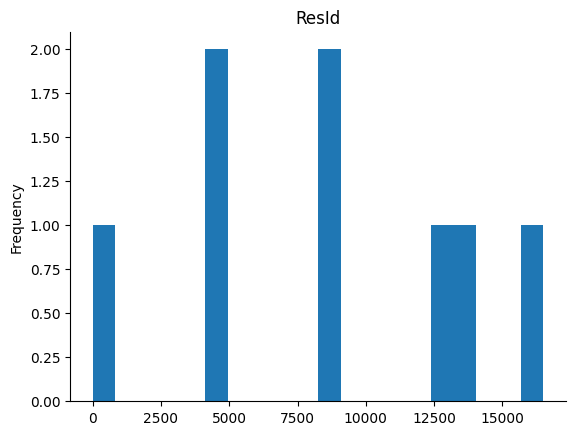

In [64]:
from matplotlib import pyplot as plt
_df_38['ResId'].plot(kind='hist', bins=20, title='ResId')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [65]:
#If we want the numbers for each category say age, country, employment etc we use grouping
df.columns


Index(['ResId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'Codingactivities', 'Edlevel', 'Learncode', 'Learncodeonline',
       'Learncodecoursescert', 'Yearscode', 'Yearscodepro', 'Devtype',
       'Orgsize', 'Purchaseinfluence', 'Techlist', 'Buynewtool', 'Country',
       'Currency', 'Comptotal', 'Languagehaveworkedwith',
       'Languagewanttoworkwith', 'Databasehaveworkedwith',
       'Databasewanttoworkwith', 'Platformhaveworkedwith',
       'Platformwanttoworkwith', 'Webframehaveworkedwith',
       'Webframewanttoworkwith', 'Misctechhaveworkedwith',
       'Misctechwanttoworkwith', 'Toolstechhaveworkedwith',
       'Toolstechwanttoworkwith', 'Newcollabtoolshaveworkedwith',
       'Newcollabtoolswanttoworkwith', 'Opsyspersonal Use',
       'Opsysprofessional Use', 'Officestackasynchaveworkedwith',
       'Officestackasyncwanttoworkwith', 'Officestacksynchaveworkedwith',
       'Officestacksyncwanttoworkwith', 'Aisearchhaveworkedwith',
       'Aisearchwanttowo

In [66]:
df['Age'].value_counts()


25-34 years old       6751
35-44 years old       3954
45-54 years old       1352
Under 18 years old     560
55-64 years old        454
65 years or older      127
Prefer not to say       81
Not Available            2
Name: Age, dtype: int64

In [67]:
df['Age'].value_counts(normalize = True) #values in percentages

25-34 years old       0.508320
35-44 years old       0.297719
45-54 years old       0.101800
Under 18 years old    0.042165
55-64 years old       0.034184
65 years or older     0.009563
Prefer not to say     0.006099
Not Available         0.000151
Name: Age, dtype: float64

In [68]:
df['Age'].value_counts()

25-34 years old       6751
35-44 years old       3954
45-54 years old       1352
Under 18 years old     560
55-64 years old        454
65 years or older      127
Prefer not to say       81
Not Available            2
Name: Age, dtype: int64

In [69]:
age_gp = df.groupby(['Age'])

In [71]:
age_gp.get_group('25-34 years old')


<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_75['Techlist'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_75, x='ResId', y='Techlist', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

ResId     Q120                      MainBranch              Age  \
1          2.0  I agree  I am a developer by profession  25-34 years old   
3          4.0  I agree  I am a developer by profession  25-34 years old   
4          5.0  I agree  I am a developer by profession  25-34 years old   
7          8.0  I agree  I am a developer by profession  25-34 years old   
9         10.0  I agree  I am a developer by profession  25-34 years old   
...        ...      ...                             ...              ...   
16492  16493.0  I agree  I am a developer by profession  25-34 years old   
16493  16494.0  I agree  I am a developer by profession  25-34 years old   
16494  16495.0  I agree  I am a developer by profession  25-34 years old   
16497  16498.0  I agree  I am a developer by profession  25-34 years old   
16498  16499.0  I agree  I am a developer by profession  25-34 years old   

                                              Employment  \
1                                    Employed, full-time   
3                                    Employed, full-time   
4      Employed, full-time;Independent contractor, fr...   
7                                    Employed, full-time   
9                     Not employed, but looking for work   
...                                                  ...   
16492                                Employed, full-time   
16493  Employed, full-time;Independent contractor, fr...   
16494                                Employed, full-time   
16497                                Employed, full-time   
16498                                Employed, full-time   

                                 RemoteWork  \
1                                    Remote   
3      Hybrid (some remote, some in-person)   
4                                    Remote   
7                                    Remote   
9                                       NaN   
...                                     ...   
16492                             In-person   
16493                                Remote   
16494  Hybrid (some remote, some in-person)   
16497                             In-person   
16498  Hybrid (some remote, some in-person)   

                                        Codingactivities  \
1      Hobby;Contribute to open-source projects;Boots...   
3                                                  Hobby   
4      Hobby;Contribute to open-source projects;Profe...   
7                                                  Hobby   
9                                                    NaN   
...                                                  ...   
16492  Hobby;Professional development or self-paced l...   
16493                       I don’t code outside of work   
16494  Hobby;Professional development or self-paced l...   
16497  Hobby;Professional development or self-paced l...   
16498                                              Hobby   

                                                 Edlevel  \
1           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
7           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
9           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
...                                                  ...   
16492    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
16493       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
16494  Some college/university study without earning ...   
16497     Professional degree (JD, MD, Ph.D, Ed.D, etc.)   
16498       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                               Learncode  \
1      Books / Physical media;Colleague;Friend or fam...   
3      Colleague;Friend or family member;Other online...   
4      Books / Physical media;Online Courses or Certi...   
7      Books / Physical media;Online Courses or Certi...   
9      Books / Physical media;Online Courses or Certi...   
...     

In [ ]:
filt = df['Age'] == '25-34 years old'
df.loc[filt]['CodingActivities'].value_counts()

In [74]:
agegp = df.groupby(['Age'])
agegp.get_group('25-34 years old')

ResId     Q120                      MainBranch              Age  \
1          2.0  I agree  I am a developer by profession  25-34 years old   
3          4.0  I agree  I am a developer by profession  25-34 years old   
4          5.0  I agree  I am a developer by profession  25-34 years old   
7          8.0  I agree  I am a developer by profession  25-34 years old   
9         10.0  I agree  I am a developer by profession  25-34 years old   
...        ...      ...                             ...              ...   
16492  16493.0  I agree  I am a developer by profession  25-34 years old   
16493  16494.0  I agree  I am a developer by profession  25-34 years old   
16494  16495.0  I agree  I am a developer by profession  25-34 years old   
16497  16498.0  I agree  I am a developer by profession  25-34 years old   
16498  16499.0  I agree  I am a developer by profession  25-34 years old   

                                              Employment  \
1                                    Employed, full-time   
3                                    Employed, full-time   
4      Employed, full-time;Independent contractor, fr...   
7                                    Employed, full-time   
9                     Not employed, but looking for work   
...                                                  ...   
16492                                Employed, full-time   
16493  Employed, full-time;Independent contractor, fr...   
16494                                Employed, full-time   
16497                                Employed, full-time   
16498                                Employed, full-time   

                                 RemoteWork  \
1                                    Remote   
3      Hybrid (some remote, some in-person)   
4                                    Remote   
7                                    Remote   
9                                       NaN   
...                                     ...   
16492                             In-person   
16493                                Remote   
16494  Hybrid (some remote, some in-person)   
16497                             In-person   
16498  Hybrid (some remote, some in-person)   

                                        Codingactivities  \
1      Hobby;Contribute to open-source projects;Boots...   
3                                                  Hobby   
4      Hobby;Contribute to open-source projects;Profe...   
7                                                  Hobby   
9                                                    NaN   
...                                                  ...   
16492  Hobby;Professional development or self-paced l...   
16493                       I don’t code outside of work   
16494  Hobby;Professional development or self-paced l...   
16497  Hobby;Professional development or self-paced l...   
16498                                              Hobby   

                                                 Edlevel  \
1           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
7           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
9           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
...                                                  ...   
16492    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
16493       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
16494  Some college/university study without earning ...   
16497     Professional degree (JD, MD, Ph.D, Ed.D, etc.)   
16498       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                               Learncode  \
1      Books / Physical media;Colleague;Friend or fam...   
3      Colleague;Friend or family member;Other online...   
4      Books / Physical media;Online Courses or Certi...   
7      Books / Physical media;Online Courses or Certi...   
9      Books / Physical media;Online Courses or Certi...   
...     

In [75]:
age_gp['Employment'].value_counts(normalize=True).loc['35-44 years old']

Employment
Employed, full-time                                                                                                               0.728153
Independent contractor, freelancer, or self-employed                                                                              0.118217
Employed, full-time;Independent contractor, freelancer, or self-employed                                                          0.068535
Not employed, but looking for work                                                                                                0.020127
Employed, part-time                                                                                                               0.017325
Not employed, and not looking for work                                                                                            0.008153
Independent contractor, freelancer, or self-employed;Employed, part-time                                                          0.007389
Employed, full-t

In [ ]:
df.columns
agegp['ConvertedCompYearly'].median().loc['25-34 years old']

64552.0

In [ ]:
agegp['ConvertedCompYearly'].agg(['median', 'mean']).loc['25-34 years old']

median    64552.000000
mean      88200.875753
Name: 25-34 years old, dtype: float64

In [ ]:
#SUM of people who worked with Python within an AGE group of 25-34 YEARS OLD
#Sum works on booleans too
filt = df['Age'] == '25-34 years old'
df.loc[filt]['LanguageHaveWorkedWith'].str.contains('Python').sum()

In [ ]:
agegp['LanguageHaveWorkedWith'].apply(lambda x: x.str.contains('Python').sum())

In [78]:
age_people = df['Age'].value_counts()
age_people

25-34 years old       6751
35-44 years old       3954
45-54 years old       1352
Under 18 years old     560
55-64 years old        454
65 years or older      127
Prefer not to say       81
Not Available            2
Name: Age, dtype: int64

In [ ]:
age_uses_python = agegp['LanguageHaveWorkedWith'].apply(lambda x: x.str.contains('Python').sum())
age_uses_python

In [ ]:
python_use = pd.concat([age_people,age_uses_python], axis = 'columns', sort = False)
#we want to concatenate it by columns, by default it concatenates by rows
python_use

Age  LanguageHaveWorkedWith
25-34 years old     8834                    4058
35-44 years old     5363                    2230
45-54 years old     1866                     767
Under 18 years old   682                     455
55-64 years old      641                     246
65 years or older    191                      64
Prefer not to say     95                      49
Not Available          1                       0